# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "/content/drive/MyDrive/data/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
756,7,137,90,41,0,32.0,0.391,39,0
368,3,81,86,16,66,27.5,0.306,22,0
348,3,99,62,19,74,21.8,0.279,26,0
114,7,160,54,32,175,30.5,0.588,39,1
55,1,73,50,10,0,23.0,0.248,21,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 21ms/step - loss: 0.7309 - accuracy: 0.5278 - val_loss: 0.7367 - val_accuracy: 0.5104
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7003 - accuracy: 0.5920 - val_loss: 0.7083 - val_accuracy: 0.5885
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6751 - accuracy: 0.6337 - val_loss: 0.6843 - val_accuracy: 0.6042
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6615 - val_loss: 0.6641 - val_accuracy: 0.6354
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6366 - accuracy: 0.6788 - val_loss: 0.6468 - val_accuracy: 0.6562
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6213 - accuracy: 0.6788 - val_loss: 0.6317 - val_accuracy: 0.6562
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6080 - accuracy: 0.6892 - val_loss: 0.6186 - val_accuracy: 0.6562
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1=model.predict(X_test_norm)
y_pred_class_nn_1=np.argmax(y_pred_prob_nn_1,axis=1)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.560983  ],
       [0.7584861 ],
       [0.34644294],
       [0.16575973],
       [0.23287044],
       [0.45496175],
       [0.02264772],
       [0.3306205 ],
       [0.8981479 ],
       [0.14608105]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.819


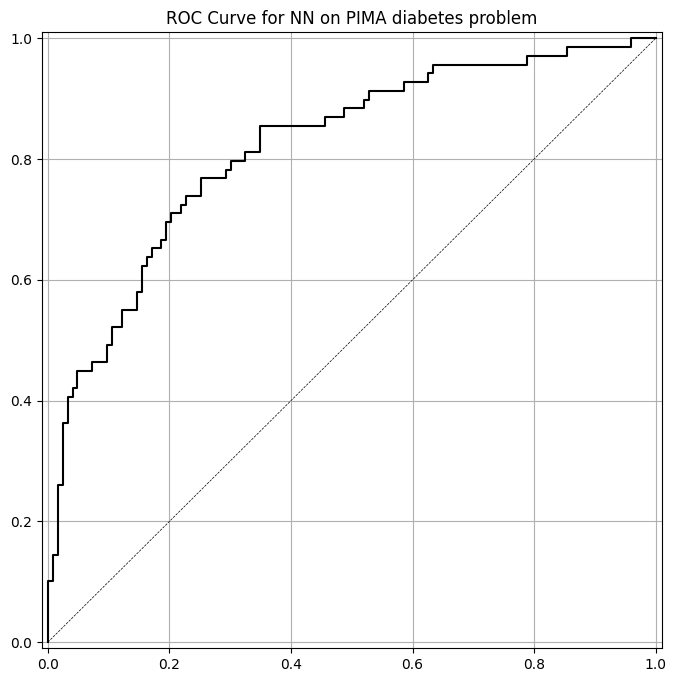

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

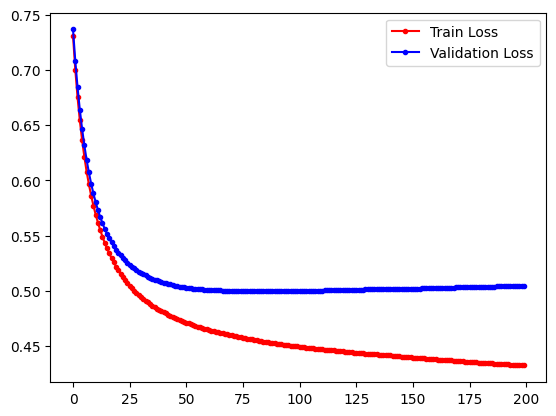

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#type your answer here

**Train loss is higher than the validation loss from the start but as the epoch increases, the train loss and validation loss decreases. However, the train loss decreases more than the validation loss. We can see in the graph that train loss is lower than validation loss when an epoch reach 25. We can also see that validation loss starts to increase slowly again.**

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

After changing the network structure, epochs, and learning rate, the model's accuracy remains similar to the previous model with the original network structure. However, the ROC-AUC decreases by 80.8% and the validation loss increases gradually after reaching 200+ epochs, while the training loss continues to decrease.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/Churn_Modelling.csv')
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4510,4511,15657747,Zito,611,Germany,Female,43.0,9,127216.31,2,0.0,1.0,17913.25,0
1887,1888,15680918,Freeman,613,Spain,Male,34.0,8,117300.02,1,1.0,0.0,139410.08,0
1078,1079,15633650,Woods,677,Germany,Female,41.0,8,146720.98,2,1.0,1.0,4195.84,0
5886,5887,15812920,Nwabugwu,607,Germany,Male,40.0,5,90594.55,1,0.0,1.0,181598.25,0
2743,2744,15658889,Watson,689,France,Male,22.0,4,136444.25,1,1.0,0.0,51980.25,1


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

LabEnc = LabelEncoder()
data['Gender'] = LabEnc.fit_transform(data['Gender'])

data.drop("Surname", axis=1, inplace=True)

data.drop("CustomerId", axis=1, inplace=True)
data = pd.get_dummies(data, columns=['Geography'], prefix='Geography')

In [ ]:
data['Geography_France'] = data['Geography_France'].astype(int)
data['Geography_Germany'] = data['Geography_Germany'].astype(int)
data['Geography_Spain'] = data['Geography_Spain'].astype(int)

In [ ]:
len(data.columns)

14

In [ ]:
X = data.drop(columns = ['Exited'])
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
sup_model  = Sequential([
    Dense(6, input_shape=(13,), activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

Epoch 1/1500
219/219 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8455 - val_loss: 0.3684 - val_accuracy: 0.8520
Epoch 2/1500
219/219 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8468 - val_loss: 0.3667 - val_accuracy: 0.8530
Epoch 3/1500
219/219 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8464 - val_loss: 0.3650 - val_accuracy: 0.8540
Epoch 4/1500
219/219 [==============================] - 1s 4ms/step - loss: 0.3635 - accuracy: 0.8482 - val_loss: 0.3634 - val_accuracy: 0.8547
Epoch 5/1500
219/219 [==============================] - 1s 4ms/step - loss: 0.3626 - accuracy: 0.8480 - val_loss: 0.3622 - val_accuracy: 0.8563
Epoch 6/1500
219/219 [==============================] - 1s 2ms/step - loss: 0.3615 - accuracy: 0.8497 - val_loss: 0.3609 - val_accuracy: 0.8563
Epoch 7/1500
219/219 [==============================] - 1s 2ms/step - loss: 0.3605 - accuracy: 0.8507 - val_loss: 0.3598 - val_accuracy:

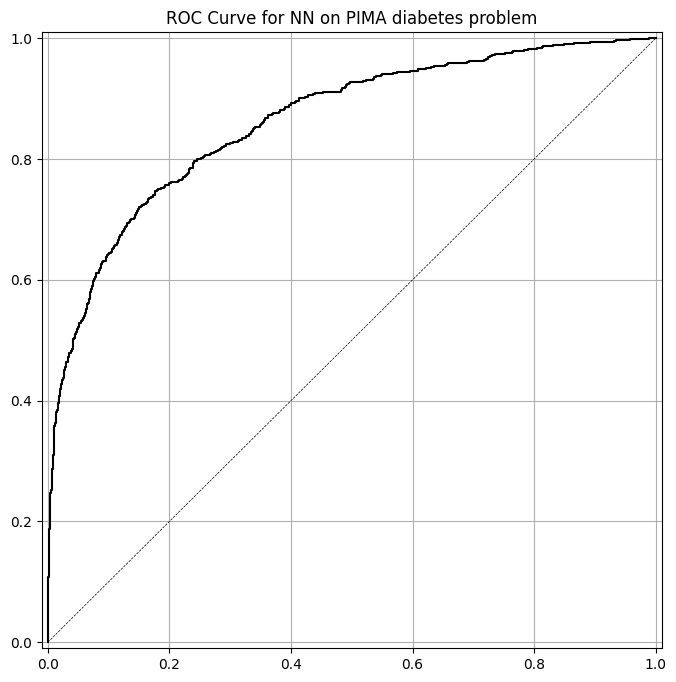

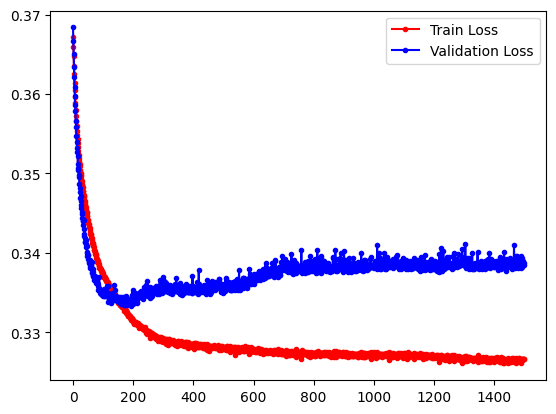

In [ ]:
sup_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
sup_run_hist_1 = sup_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)
y_pred_prob_nn=sup_model.predict(X_test_norm)
y_pred_class_nn=np.argmax(y_pred_prob_nn,axis=1)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn)))

plot_roc(y_test, y_pred_prob_nn, 'NN')

fig, ax = plt.subplots()
ax.plot(sup_run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(sup_run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Different network structure, learning rate, and epoch

In [ ]:
sup_model  = Sequential([
    Dense(4, input_shape=(13,), activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.5610 - accuracy: 0.7969 - val_loss: 0.5336 - val_accuracy: 0.7933
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7974 - val_loss: 0.5152 - val_accuracy: 0.7933
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7974 - val_loss: 0.5058 - val_accuracy: 0.7933
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4889 - accuracy: 0.7974 - val_loss: 0.4985 - val_accuracy: 0.7933
Epoch 5/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4822 - accuracy: 0.7974 - val_loss: 0.4923 - val_accuracy: 0.7933
Epoch 6/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4766 - accuracy: 0.7974 - val_loss: 0.4872 - val_accuracy: 0.7933
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.7974 - val_loss: 0.4823 - val_accuracy: 0.7933

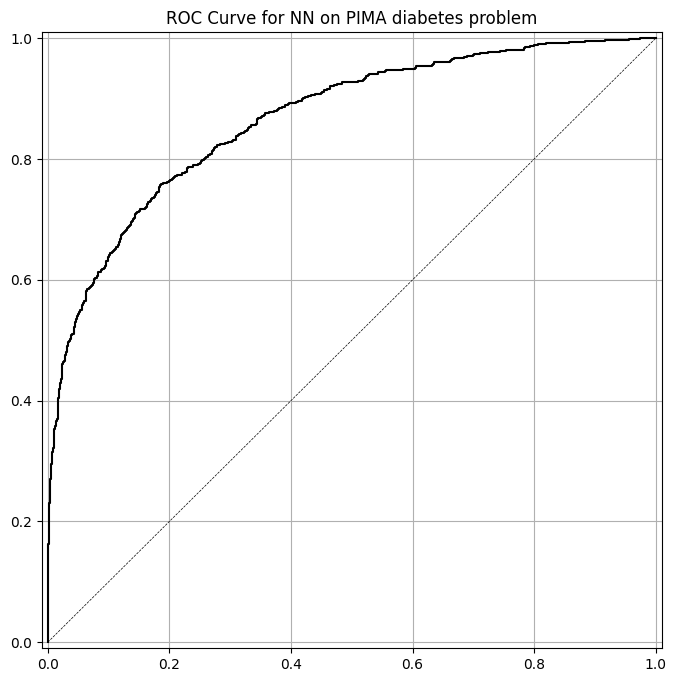

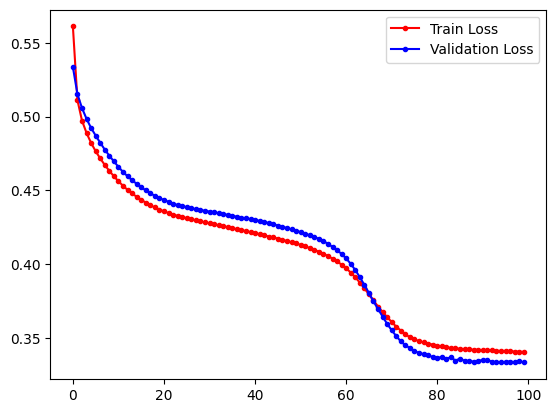

In [ ]:
sup_model.compile(SGD(lr = .00001), "binary_crossentropy", metrics=["accuracy"])
sup_run_hist_1 = sup_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100)
y_pred_prob_nn=sup_model.predict(X_test_norm)
y_pred_class_nn=np.argmax(y_pred_prob_nn,axis=1)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn)))

plot_roc(y_test, y_pred_prob_nn, 'NN')

fig, ax = plt.subplots()
ax.plot(sup_run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(sup_run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Modifying the epoch, learning rate and network structure from the first model of the supplementary activity yielded a similar ROC-AUC which is 86%. Additionally, the training loss and validation loss decreases as epoch increases.

## Conclusion

In this activity, I learned how to build and train neural networks using the Keras library and TensorFlow framework. Mastering these tools is crucial for my ability to construct and optimize neural networks, as they offer a wide range of functionalities. However, I still have some uncertainties to address, such as understanding how the network structure works and how to manipulate it to achieve better results. Visualizing and evaluating the model's performance through training and validation loss plots significantly aided my comprehension of the results.